# Importation des donnees et verification

In [64]:
donnees=read.csv('donnees.csv',header = TRUE,sep = ';')
head(donnees,7)

id,incGroup,name,popGroup,ED,Edu,HI,QOL,PE,OA
1,Low,Albania,Small,34.0862,81.0164,71.0244,67.9240,58.6742,57
2,Middle,Algeria,Medium,25.8057,74.8027,66.1951,60.9347,32.6054,85
3,Middle,Argentina,Medium,37.4511,69.8825,78.2683,68.1559,68.6647,46
4,High,Australia,Medium,71.4888,91.4802,95.1707,90.5729,90.9629,4
5,High,Austria,Small,53.9431,90.4578,90.3415,87.5630,91.2073,18
6,Low,Azerbaijan,Small,53.6457,68.9880,58.9512,68.9572,40.0390,69
7,Low,Bangladesh,Large,31.0580,58.6306,51.7073,48.5346,47.0631,88


# Exploration des variables

### Fonction resume

In [2]:
resume<-function(ech,dig){
    tableau=c(min(ech),quantile(ech,probs = c(0.25)),median(ech),quantile(ech,probs = c(0.75)),max(ech),mean(ech),sd(ech))
    names(tableau)=c('min','Q1','mediane','Q3','max','moyenne','ecart-type')
    print(tableau,digit=dig)
}
resumepourHI<-function(ech,dig){
    tableau=c(min(ech),quantile(ech,probs = c(0.1,0.2)),median(ech),quantile(ech,probs = c(0.75)),max(ech),mean(ech),sd(ech))
    #names(tableau)=c('min','Q1','mediane','Q3','max','moyenne','ecart-type')
    #print(tableau,digit=dig)
    print(tableau)
}

On cherche a etudier les variables suivantes : 

incGroup, popGroup, ED, Edu, HI, QOL, PE

In [3]:
incGroup=donnees$incGroup
popGroup=donnees$popGroup
ED=donnees$ED
Edu=donnees$Edu
HI=donnees$HI
QOL=donnees$QOL
PE=donnees$PE

In [48]:
print(resume(ED,4))
print(resume(Edu,4))
print(resume(HI,4))
print(resume(QOL,4))
print(resume(PE,4))
resumepourHI(HI)

       min         Q1    mediane         Q3        max    moyenne ecart-type 
     21.66      37.45      45.49      56.80      83.06      47.05      13.82 
       min         Q1    mediane         Q3        max    moyenne ecart-type 
  21.66430   37.44718   45.49335   56.79835   83.05700   47.04829   13.81998 
       min         Q1    mediane         Q3        max    moyenne ecart-type 
     44.50      73.46      80.82      89.47     102.00      79.91      11.11 
       min         Q1    mediane         Q3        max    moyenne ecart-type 
  44.50240   73.46080   80.81695   89.46745  102.00000   79.90986   11.10996 
       min         Q1    mediane         Q3        max    moyenne ecart-type 
     13.07      61.37      73.44      86.12     100.00      69.99      21.03 
       min         Q1    mediane         Q3        max    moyenne ecart-type 
  13.07320   61.36590   73.43900   86.11585  100.00000   69.98610   21.02582 
       min         Q1    mediane         Q3        max    moyenn

In [24]:
summary(ED)
summary(Edu)
summary(HI)
summary(QOL)
summary(PE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  21.66   37.45   45.49   47.05   56.80   83.06 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  44.50   73.46   80.82   79.91   89.47  102.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13.07   61.37   73.44   69.99   86.12  100.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  26.33   57.69   68.64   67.49   78.49   98.45 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  25.64   47.13   62.43   62.75   78.47   98.53 

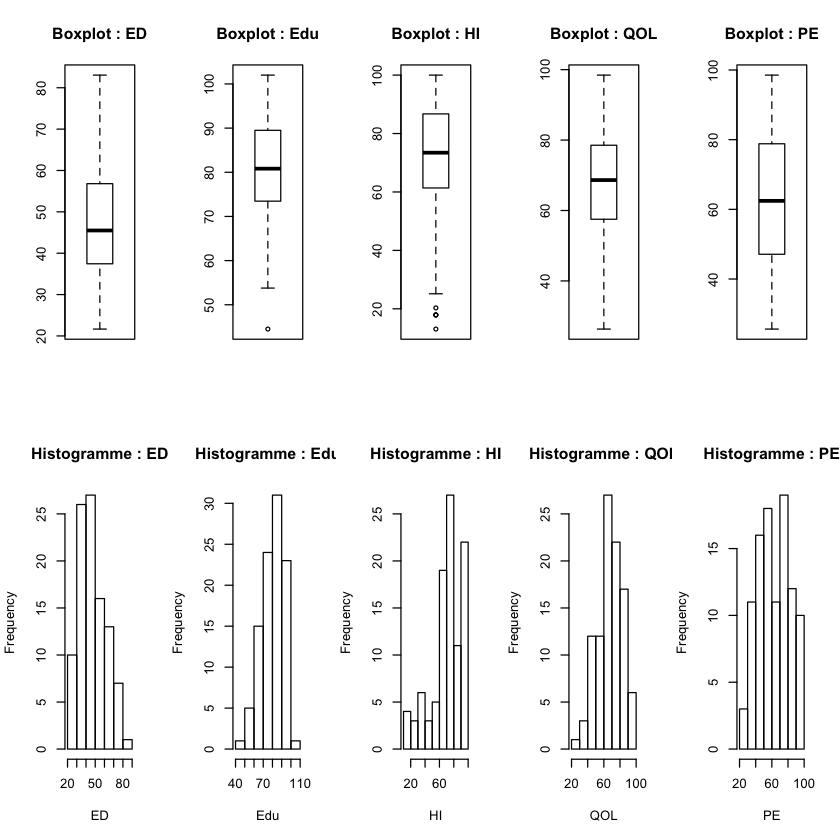

In [40]:
par(mfrow=c(2,5))
boxplot(ED,main = 'Boxplot : ED')
boxplot(Edu,main = 'Boxplot : Edu')
boxplot(HI,main = 'Boxplot : HI')
boxplot(QOL,main = 'Boxplot : QOL')
boxplot(PE,main = 'Boxplot : PE')
hist(ED,main = 'Histogramme : ED')
hist(Edu,main = 'Histogramme : Edu')
hist(HI,main = 'Histogramme : HI')
hist(QOL,main = 'Histogramme : QOL')
hist(PE,main = 'Histogramme : PE')

## Explication :
### Ce que nous disent les Histogrammes :
#### Les variables ED, Edu, QOL, PE se repartissent sous forme de cloche. cad normalement.
#### La variable HI semble moins bien reprtie : Il semblerait qu'un nombre important de pays est des indice assez faible. En effet10% des pays on un indice inferieur a 36, et 20% inferieur a 58.
### Ce que nous indique les Boxplot
#### On remarque qu'il n'y a pas de valeurs aberantes dans ED QOL et PE, mais il y en a une dans Edu et plusieurs dans HI
###### Edu : une valeur clairement en dessous de outes les autre de 10 points qui correspond au pay le Burkina_Faso
###### HI plusieurs pays on des indice de HI tres inferieur par rapport au reste du monde : les pays d'indice 59 63 91 100


# Variable PopGroup, IncGroup

## On converti les variables

In [55]:
IncGroup=c()
for (i in 1:length(incGroup)){
    if(incGroup[i]=='Low'){
        IncGroup=c(IncGroup,1)
    }
    if(incGroup[i]=='Middle'){
        IncGroup=c(IncGroup,2)
    }
    if(incGroup[i]=='High'){
        IncGroup=c(IncGroup,3)
    }
}

In [54]:
PopGroup=c()
for (i in 1:length(popGroup)){
    if(popGroup[i]=='Small'){
        PopGroup=c(PopGroup,1)
    }
    if(popGroup[i]=='Medium'){
        PopGroup=c(PopGroup,2)
    }
    if(popGroup[i]=='Large'){
        PopGroup=c(PopGroup,3)
    }
}


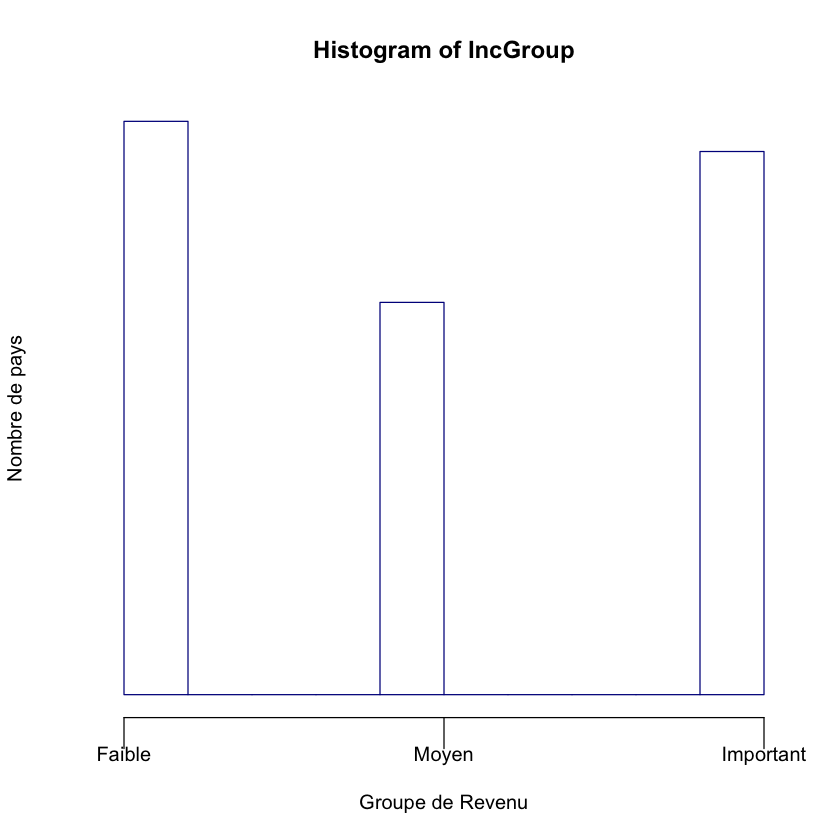

In [53]:

hist(IncGroup,axes = FALSE,xlab='Groupe de Revenu',ylab = 'Nombre de pays',border = 'dark blue')
axis(side = 1,
     at = c(1,2,3),
     labels = c('Faible','Moyen','Important'),
     tck=-.05)

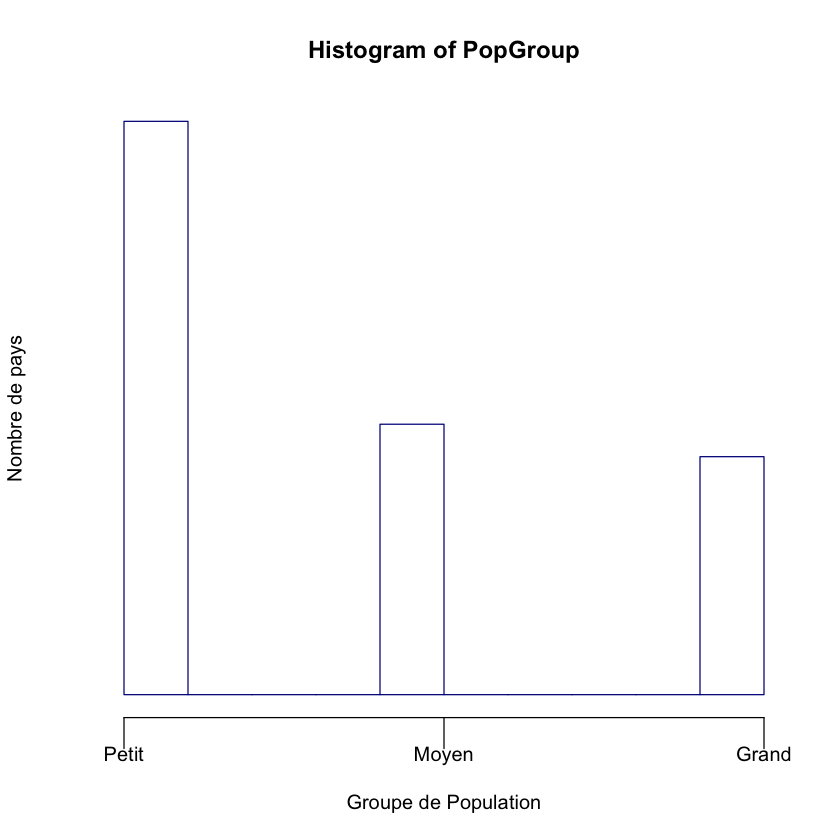

In [52]:
hist(PopGroup,axes = FALSE,xlab='Groupe de Population',ylab = 'Nombre de pays',border='dark blue')
axis(side = 1,
     at = c(1,2,3),
     labels = c('Petit','Moyen','Grand'),
     tck=-.05)

# Recherche des pays au valeurs extremes

In [80]:
head(sort(HI),5)

[1] 13.0732 17.9024 17.9024 17.9024 20.3171

### Ici t va stocker les coordonnees des pays au valeurs extreme de HI

In [60]:
t=c()
for (i in 1:length(donnees$id)){
    if (donnees$HI[i]<18){
        t=c(t,i)
        }
}
t

[1]  59  63  91 100

In [61]:
donnees$name[59]
donnees$name[63]
donnees$name[91]
donnees$name[100]

[1] Mozambique
100 Levels: Albania Algeria Argentina Australia Austria ... Zambia

[1] Nigeria
100 Levels: Albania Algeria Argentina Australia Austria ... Zambia

[1] Uganda
100 Levels: Albania Algeria Argentina Australia Austria ... Zambia

[1] Zambia
100 Levels: Albania Algeria Argentina Australia Austria ... Zambia

## Question 2 : La France, grande population, et grand revenu

#### Rang de la France dans les differentes variables :

In [78]:
rank(-donnees$ED, ties.method= "min")[32]
rank(-donnees$Edu, ties.method= "min")[32]
rank(-donnees$HI, ties.method= "min")[32]
rank(-donnees$QOL, ties.method= "min")[32]
rank(-donnees$PE, ties.method= "min")[32]

[1] 18

[1] 14

[1] 7

[1] 11

[1] 16

## Question 3-4 : Edu selon pop et inc group

#### Separationdes donnees

In [102]:
un=c()
deux=c()
trois=c()
for (i in 1:length(donnees$id)){
    if (donnees$popGroup[i]=='Small'){
        un=c(un,i)
        }
    if (donnees$popGroup[i]=='Medium'){
        deux=c(deux,i)
        }
    if (donnees$popGroup[i]=='Large'){
        trois=c(trois,i)
        }
}
eduun=donnees$Edu[un]
edudeux=donnees$Edu[deux]
edutrois=donnees$Edu[trois]
un=c()
deux=c()
trois=c()
for (i in 1:length(donnees$id)){
    if (donnees$incGroup[i]=='Low'){
        un=c(un,i)
        }
    if (donnees$incGroup[i]=='Middle'){
        deux=c(deux,i)
        }
    if (donnees$incGroup[i]=='Hight'){
        trois=c(trois,i)
        }
}
incun=donnees$Edu[un]
incdeux=donnees$Edu[deux]
inctrois=donnees$Edu[trois]


#### Representation

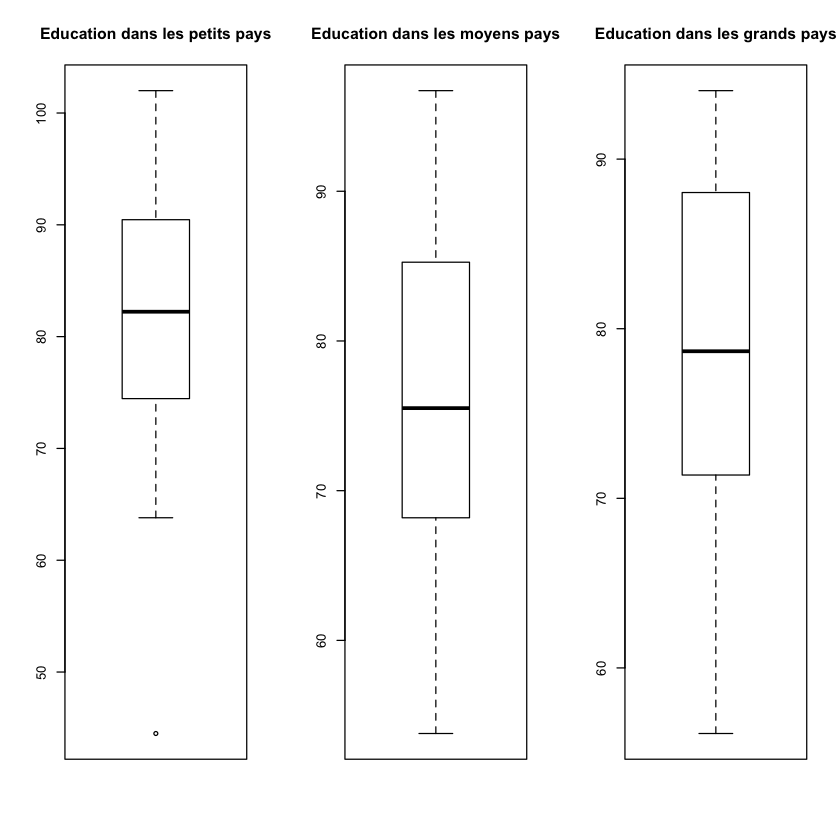

In [122]:
par(mfrow=c(1,3))
boxplot(eduun,main = 'Education dans les petits pays')
boxplot(edudeux,main = 'Education dans les moyens pays')
boxplot(edutrois,main = 'Education dans les grands pays')

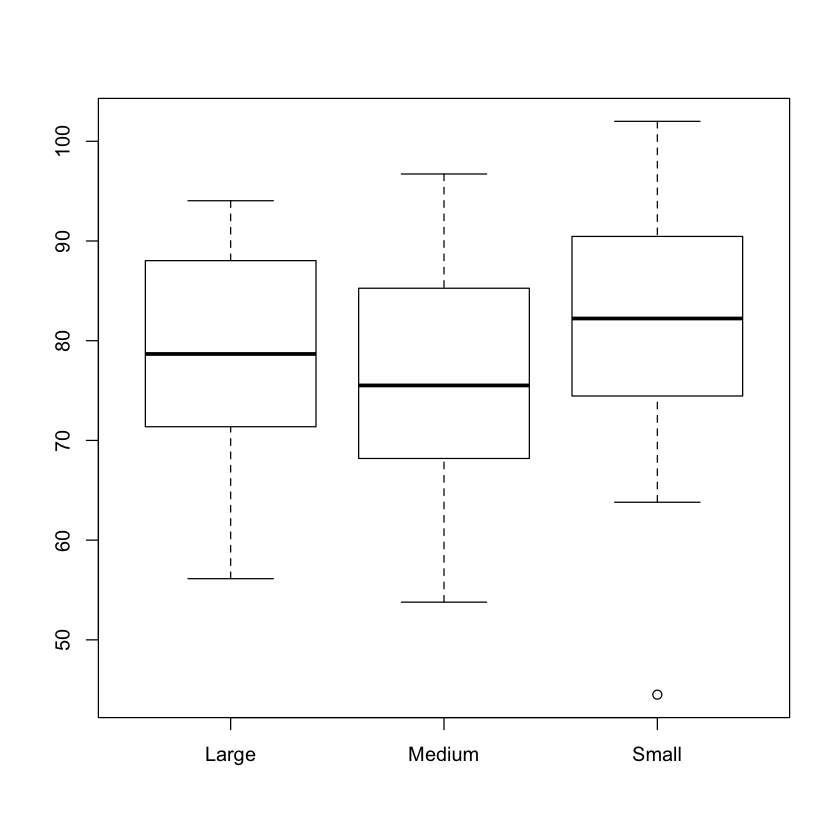

In [125]:
boxplot(donnees$Edu ~ donnees$popGroup)

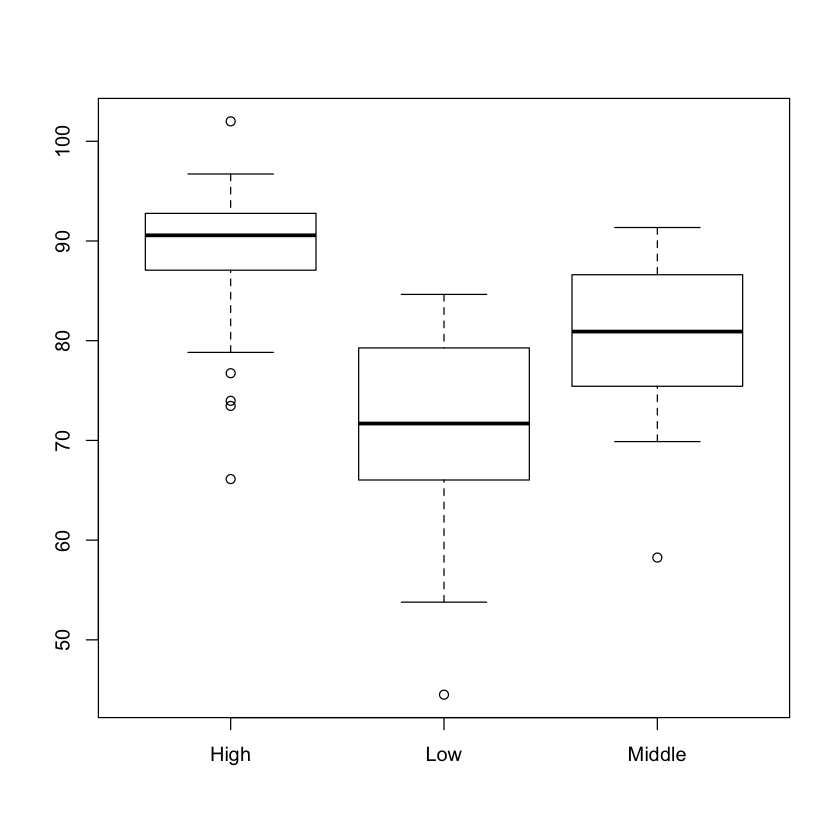

In [126]:
boxplot(donnees$Edu ~ donnees$incGroup)

# Question 5,6,7 : Correlation et droite de regression

In [127]:
lsfit(donnees$Edu,donnees$ED)

$coefficients
  Intercept           X 
-14.7371988   0.7731897 

$residuals
  [1] -13.8176483 -17.2937793  -1.8441313  15.4944492  -1.2607416  15.0420869
  [7]   0.4626220  -0.3180148   4.0498910 -21.3755550   1.6332639   7.4025428
 [13]  -5.1226130  13.1178009  -9.8843365   8.4143671  10.4812771  17.0034160
 [19]  -2.4188507  -9.3324903  -2.2274416 -17.6748225  -5.5073898   9.7050959
 [25]  -6.3462696 -22.9387350  -3.6458363  -8.2526361  -6.1445518   4.9654314
 [31]   6.3611481   5.6489629   6.1630481  -3.5007833  -3.6239231  -2.3015693
 [37] -12.7604732  -8.7785143  13.5403728  -5.3182316 -12.4161751  -1.4250630
 [43]  11.5457724  -4.0708505  -3.3218016  11.0721536   0.6820343  -7.2796371
 [49]  -2.3478635  12.9770671  14.7241639 -10.6567234  -4.9918481  15.7069069
 [55]  -1.4211610   9.8368109  -1.0298967   6.5355080  -5.1625265   4.9069196
 [61]   0.7089977  -5.4519263  -5.0996509   7.4765359  -2.7036318   4.5632409
 [67]  -3.7035465 -23.0146192  -5.1339386  -8.1820411  -7.2997719 

In [129]:
cor(donnees$Edu,donnees$ED)
cor(donnees$Edu,donnees$HI)
cor(donnees$Edu,donnees$QOL)
cor(donnees$Edu,donnees$PE)

[1] 0.6215714

[1] 0.7859561

[1] 0.8463582

[1] 0.5871058

In [130]:
lsfit(donnees$Edu,donnees$QOL)

$coefficients
 Intercept          X 
-28.918939   1.206472 

$residuals
  [1]  -0.9010513  -0.3936984  12.7635834   9.1235706   7.3471672  14.6440723
  [7]   6.7173818  -1.4335067   3.2259859 -12.4682546  -9.6219341   5.2326342
 [13]   2.8332496   1.5570545  -8.3666497   0.2454211   1.1296102  -4.2634187
 [19]  -8.5289910   2.3287472  -5.7702328  -4.7308940  -3.7166667  10.1728795
 [25]  -2.1786691  -4.9003377  -1.4864612  -3.0871341 -12.1716992   2.0537828
 [31]  -2.6608698   6.4663577   7.7701248   0.5537652   8.5289832  -0.9988039
 [37]  -4.3152702  -4.3713586  -3.5053686  -8.4509436  -2.1621350   3.6929085
 [43]   5.9674927   7.9642977  -0.7204212   2.8090497  -3.7058749 -10.9526423
 [49] -15.6868999 -10.7495789  19.5295659  -7.4911439  -6.4552275  14.9257958
 [55] -18.6697516  -6.0762605   6.4930865   7.0526040  -2.7558341   4.1579934
 [61]   4.0992879   2.6139658  -8.6328993  22.2445106   3.6554293  -2.2863389
 [67]  -6.9453374  -7.5791534 -10.2304235 -11.5541787  -7.0442724   3.

Avec la variable la plus correle

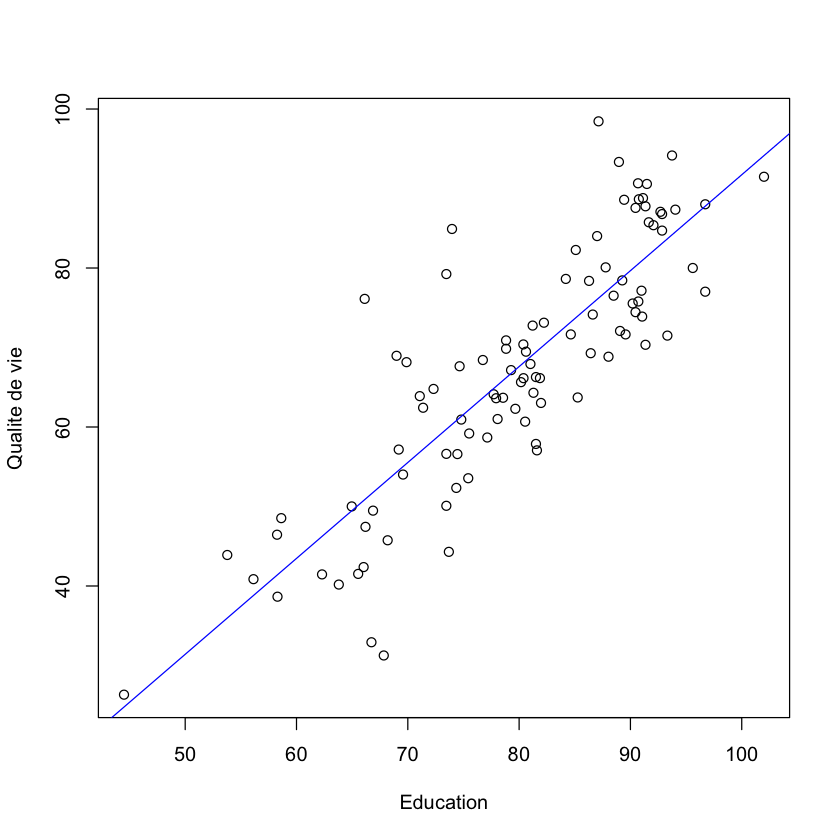

In [139]:
plot(donnees$Edu,donnees$QOL, xlab = 'Education',ylab = 'Qualite de vie',)
abline(lsfit(donnees$Edu,donnees$QOL),col = 'blue' )


Avec la moins

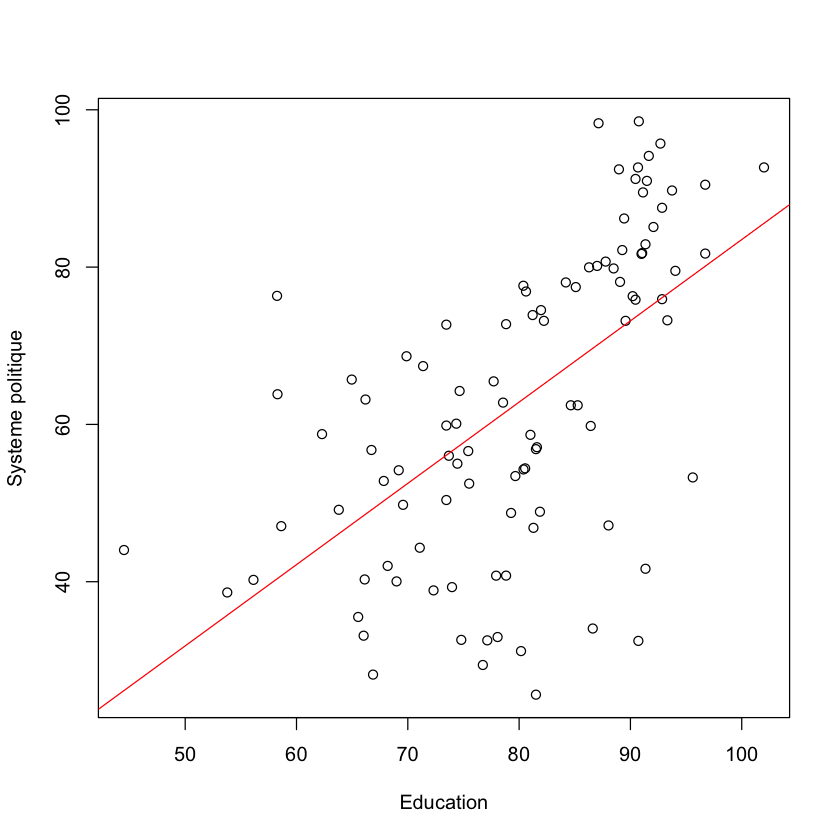

In [143]:
plot(donnees$Edu,donnees$PE, xlab = 'Education',ylab = 'Systeme politique')
abline(lsfit(donnees$Edu,donnees$PE),col = 'red' )



In [157]:
res=lsfit(donnees$Edu,donnees$PE)$residuals

In [159]:
lsfit(donnees$Edu,donnees$PE)

$coefficients
Intercept         X 
-19.82648   1.03334 

$residuals
  [1]  -5.2167856 -24.8647227  16.2788153  16.2592544  17.5601409 -11.4225623
  [7]   6.3042503 -35.6266579   9.7887540  -7.3950760  16.5998159  13.4865058
 [13]   8.0259300  17.8699803 -15.2686701  10.3559644  13.4212136 -27.8740268
 [19]  -1.5061000  14.3963318   2.2102409 -41.4333140   7.4758442  18.7919829
 [25]   1.4236401  -9.0567869 -19.9368093   3.7702159  -3.3720006   2.0549063
 [31]   7.0998274   8.3283152  15.1556700  18.4003533   9.3601885  -2.2905160
 [37]  -2.1035405   2.9205626  14.5866721   3.0864902 -31.8386735  11.4284057
 [43]  10.8737142  10.0682796   4.9966088   2.1793415 -15.8765410 -32.9253848
 [49]  -0.3028356   1.6023644  -5.6983841   0.4457633   5.9093331  20.3230471
 [55]   7.6170321  -9.6837467   6.9339483  -9.2980523  23.4268025  19.7493767
 [61]  19.2572733   2.5065131 -12.3827370  28.0752188 -20.8539350 -21.0882455
 [67]   9.6589517  -8.9884292  -5.8462126  -7.5475087   7.5217571  10.6369

### Apres analyse des residus, les pays les plus loin de la droite de regression sont les pays aux indices suivant :

Pays eloigner de la droite de regression : numeros : 22 , 86 , 81 , 8 , 48

In [164]:
donnees$name[22]
donnees$name[86]
donnees$name[81]
donnees$name[8]
donnees$name[48]

[1] Cuba
100 Levels: Albania Algeria Argentina Australia Austria ... Zambia

[1] Syria
100 Levels: Albania Algeria Argentina Australia Austria ... Zambia

[1] South_Africa
100 Levels: Albania Algeria Argentina Australia Austria ... Zambia

[1] Belarus
100 Levels: Albania Algeria Argentina Australia Austria ... Zambia

[1] Kazakhstan
100 Levels: Albania Algeria Argentina Australia Austria ... Zambia

## On supprime les 5 pays puis on recommence

In [74]:
donnees2 = read.csv('donnees modifie.csv',header = TRUE,sep = ';')

In [78]:
cor(donnees$Edu,donnees$ED)
cor(donnees$Edu,donnees$HI)
cor(donnees$Edu,donnees$QOL)
cor(donnees2$Edu,donnees2$PE)

[1] 0.6215714

[1] 0.7859561

[1] 0.8463582

[1] 0.6968789

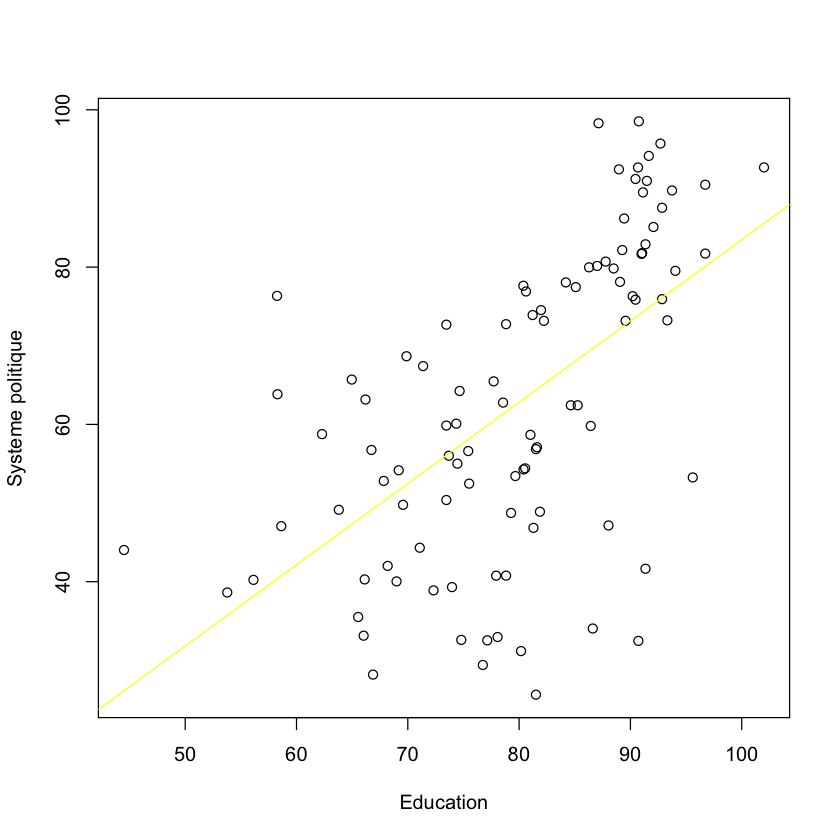

In [76]:
plot(donnees$Edu,donnees$PE, xlab = 'Education',ylab = 'Systeme politique')
abline(lsfit(donnees$Edu,donnees$PE),col = 'yellow' )